In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn2
from matplotlib_venn import venn3_circles as venn3
from collections import Counter


In [3]:
import plotly.express as px

In [37]:
dt = pd.read_csv('Dataset .csv')
dt

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset .csv'

In [4]:
dt = pd.read_csv('/content/drive/MyDrive/ML_datasets/restaurant_location_based/Dataset.csv')
pd.set_option('display.max_columns', None)
dt

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
map = px.scatter_mapbox(dt,lon=dt['Longitude'],lat=dt['Latitude'],hover_name=dt['Restaurant Name'],zoom=0.5,title='Restaurant map',color=dt['Aggregate rating'],size=dt['Votes'] ,width= 1100, height= 475)
#map.update_layout( mapbox_style='open-street-map')
map.update_layout(mapbox_style='carto-positron')
map.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
map.show()

In [11]:
dt['Is delivering now'].unique()


array(['No', 'Yes'], dtype=object)

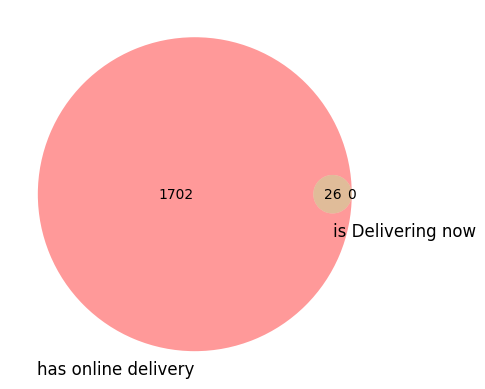

In [8]:
venn2(subsets = (
        set(dt['Restaurant Name'][dt['Has Online delivery'] == 'Yes'].to_list()),
        set(dt['Restaurant Name'][dt['Is delivering now']== 'Yes'].to_list()),
                  ),
        set_labels=('has online delivery', 'is Delivering now')
    )

In [112]:
city_grouped = dt.groupby('City')['Restaurant ID'].count().sort_values(ascending=False)
print(f"Cities with numbers of Restaurants:{city_grouped}")

locality_grouped = dt.groupby('Locality')['Restaurant ID'].count().sort_values(ascending=False)
print(f"Locality and numbers of Restaurants{locality_grouped}")


Cities with numbers of Restaurants:City
New Delhi      5473
Gurgaon        1118
Noida          1080
Faridabad       251
Ghaziabad        25
               ... 
Dicky Beach       1
Lorn              1
Quezon City       1
Lincoln           1
Lakeview          1
Name: Restaurant ID, Length: 141, dtype: int64
Locality and numbers of RestaurantsLocality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
                      ... 
Plaza Mall, MG Road      1
Grovetown                1
Podanur                  1
Pondok Aren              1
��mitk�_y                1
Name: Restaurant ID, Length: 1208, dtype: int64


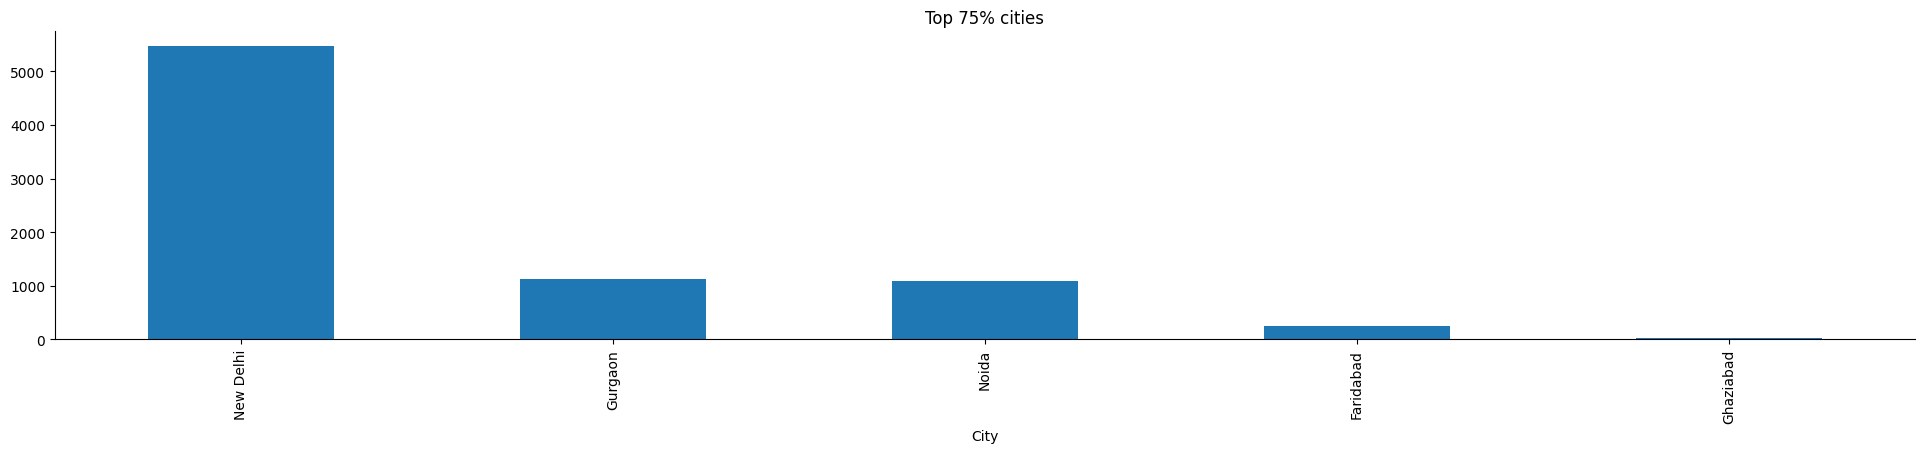

In [110]:
city_grouped[city_grouped > 21].plot(kind='bar', figsize=(24, 4), title='Top 75% cities', )
plt.xlabel("No of Restaurants")
plt.ylabel("Cityies")
plt.gca().spines[['top', 'right']].set_visible(False)

count    1208.000000
mean        7.906457
std        15.566370
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       122.000000
Name: Restaurant ID, dtype: float64
Majority of number of Restaurant are from those 289 locations
Locality
Connaught Place                   122
Rajouri Garden                     99
Shahdara                           87
Defence Colony                     86
Malviya Nagar                      85
                                 ... 
Winter Park                         6
Gainesville                         6
Hotel The Royal Plaza, Janpath      6
C Scheme                            6
Okhla Phase 2                       6
Name: Restaurant ID, Length: 289, dtype: int64


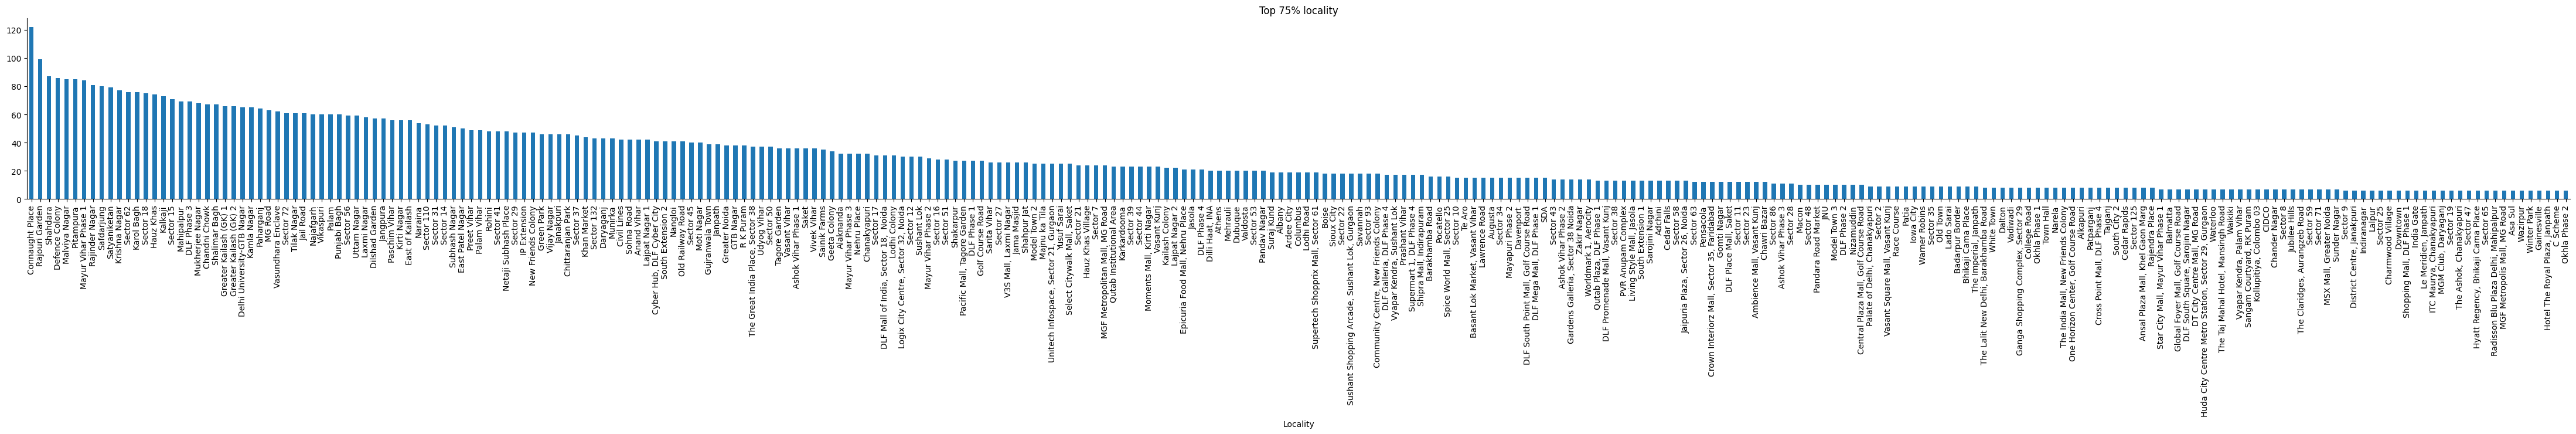

In [132]:
print(locality_grouped.describe())
print(f"Majority of number of Restaurant are from those {locality_grouped[locality_grouped > 5].shape[0]} locations")
print(locality_grouped[locality_grouped > 5])
locality_grouped[locality_grouped > 5].plot(kind='bar', figsize=(56, 4), title='Top 75% locality', )
plt.gca().spines[['top', 'right']].set_visible(False)


In [147]:
(f"Those 289 Locality belongs from{dt['City'][dt['Locality'].isin(locality_grouped[locality_grouped > 5].index)].value_counts().shape[0]} Cities")
dt['City'][dt['Locality'].isin(locality_grouped[locality_grouped > 5].index)].value_counts()

,count
City,
New Delhi,5218
Noida,986
Gurgaon,984
Faridabad,217
Athens,20
Waterloo,20
Dubuque,20
Valdosta,20
Albany,19


#                                              **Vote vs Rating**

<BarContainer object of 9551 artists>

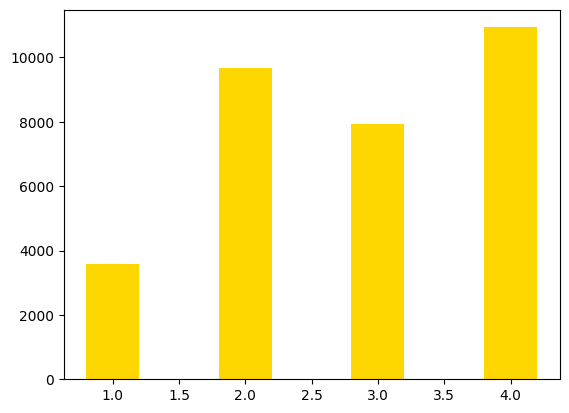

In [14]:
plt.bar( dt['Price range'],dt['Votes'], color ='gold', width = 0.4)

In [179]:
avg_ratings_by_city = dt.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(f"\tAverage rating\n{avg_ratings_by_city}")

avg_price_by_city = dt.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False)
print(f"\n\tAverage cost for two\n{avg_price_by_city}")

	Average rating
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64

	Average cost for two
City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Mc Millan             10.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64


TypeError: sequence item 2: expected str instance, float found

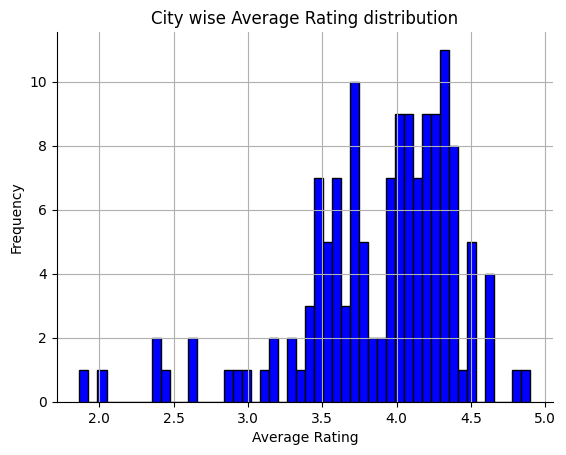

In [57]:
avg_ratings_by_city.hist( bins=50, color='blue', edgecolor='black')
plt.title('City wise Average Rating distribution')
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.gca().spines[['top', 'right']].set_visible(False)

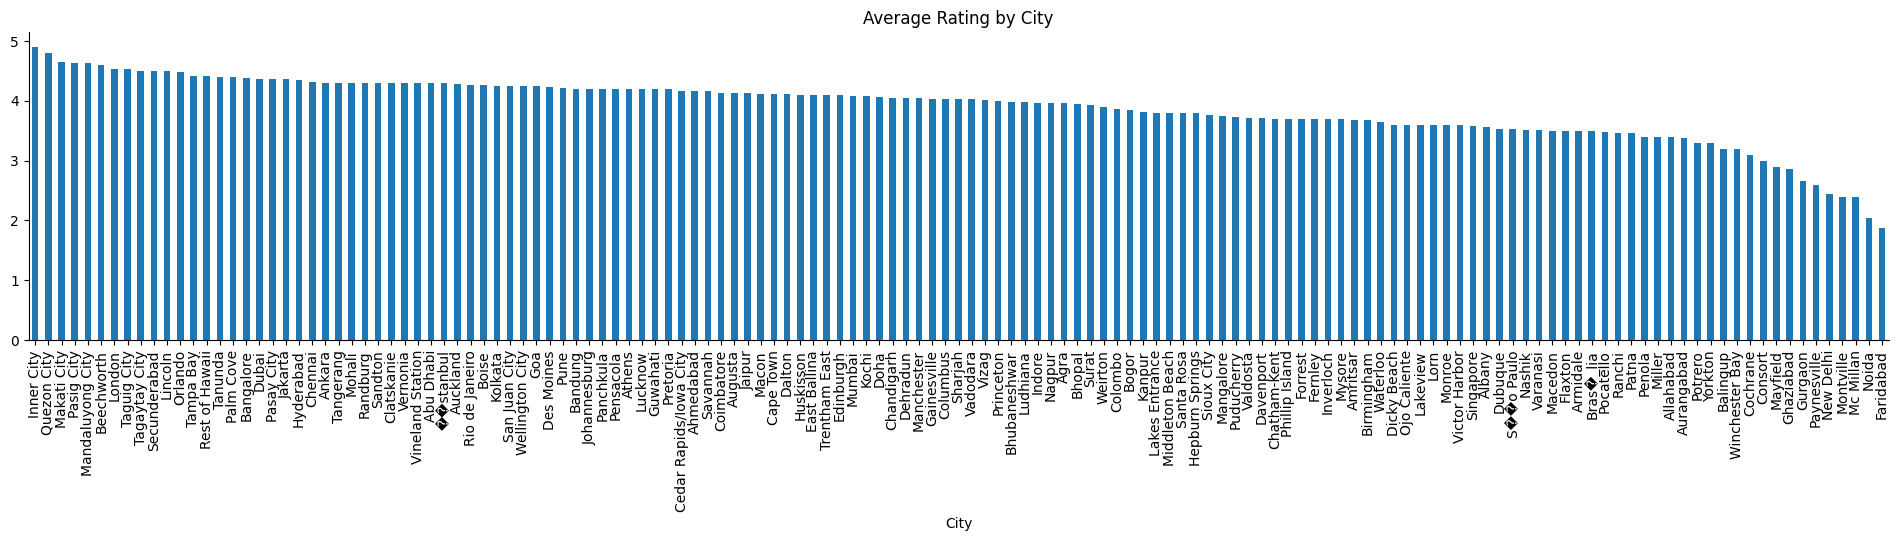

In [66]:
avg_ratings_by_city.plot(kind='bar', figsize=(24, 4), title='Average Rating by City')
plt.gca().spines[['top', 'right']].set_visible(False)

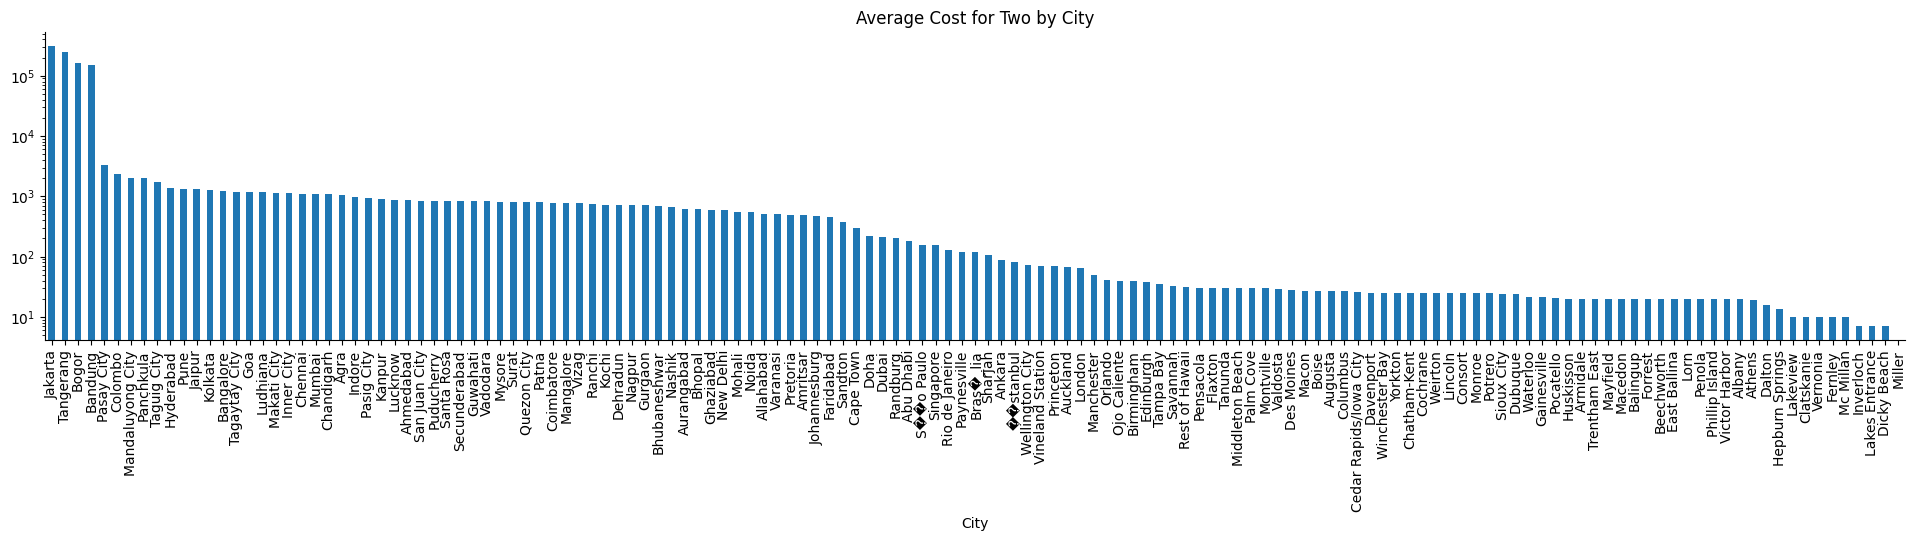

In [64]:
avg_price_by_city.plot(kind='bar', figsize=(24, 4),log=True, title='Average Cost for Two by City')
plt.gca().spines[['top', 'right']].set_visible(False)

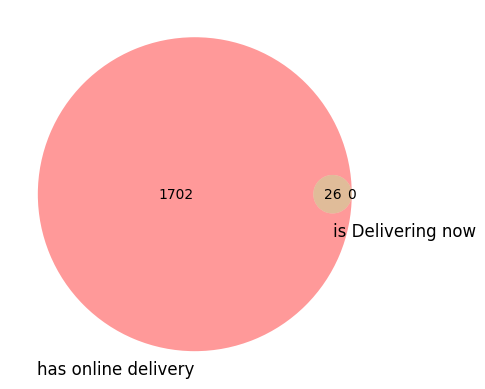

In [246]:
venn2(subsets = (
        set(dt['Restaurant Name'][dt['Has Online delivery'] == 'Yes'].to_list()),
        set(dt['Restaurant Name'][dt['Is delivering now']== 'Yes'].to_list()),
                  ),
        set_labels=('has online delivery', 'is Delivering now')
    )

In [172]:
print(f"Indian Rupees(Rs.) is accepted by those {dt[dt['City'].isin(city_grouped[city_grouped > 21].index)].shape[0]} cities")

Indian Rupees(Rs.) is accepted by those 7947 cities


# **cuisines**

In [255]:
#cuisines_by_city.replace(' ','').apply(lambda x: x.replace(' ','')).reset_index()

AttributeError: 'list' object has no attribute 'replace'

In [334]:
cuisines_by_city = dt.groupby('City')['Cuisines'].apply(list)

In [350]:
cuisine_counts_df.apply(set).apply(list).apply(lambda x : set(x)).apply(len)#.describe()

,Cuisines
City,
Abu Dhabi,17
Agra,15
Ahmedabad,21
Albany,17
Allahabad,18
...,...
Wellington City,17
Winchester Bay,1
Yorkton,1


In [332]:
cuisine_counts_df.apply(set).apply(list).apply(lambda x : set(x)).apply(Counter)#.describe()

,Cuisines
City,
Abu Dhabi,"{'Italian, Pizza': 1, 'Thai, Japanese, Chinese..."
Agra,"{'Rajasthani, Gujarati, Mughlai': 1, 'Italian,..."
Ahmedabad,"{'Cafe, Italian': 1, 'Fast Food, Street Food, ..."
Albany,"{'Seafood, Tapas, Bar Food': 1, 'Italian, Pizz..."
Allahabad,"{'Italian, Pizza': 1, 'North Indian, Mughlai':..."
...,...
Weirton,"{'Burger, Greek, Sandwich': 1}"
Wellington City,"{'Asian': 1, 'Japanese, Asian': 1, 'Italian, C..."
Winchester Bay,"{'Burger, Seafood, Steak': 1}"


In [346]:
Counter(cuisine_counts_df.apply(set).apply(list).apply(lambda x : set(x))[0]).most_common()


<ipython-input-346-aba981b1cc9c>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



[('Italian, Pizza', 1),
 ('Thai, Japanese, Chinese, Indonesian, Vietnamese', 1),
 ('Asian', 1),
 ('Filipino, Japanese, Asian', 1),
 ('Indian', 1),
 ('Indian, North Indian, Mughlai, Biryani', 1),
 ('American, Mexican, Seafood', 1),
 ('American, Desserts', 1),
 ('Pakistani, Afghani, Indian, Hyderabadi', 1),
 ('Indian, North Indian', 1),
 ('Turkish, Arabian, Middle Eastern', 1),
 ('Indian, South Indian', 1),
 ('Chinese', 1),
 ('Fast Food, Burger', 1),
 ('Indian, North Indian, Chinese', 1),
 ('American', 1),
 ('Lebanese, Arabian, Middle Eastern', 1)]

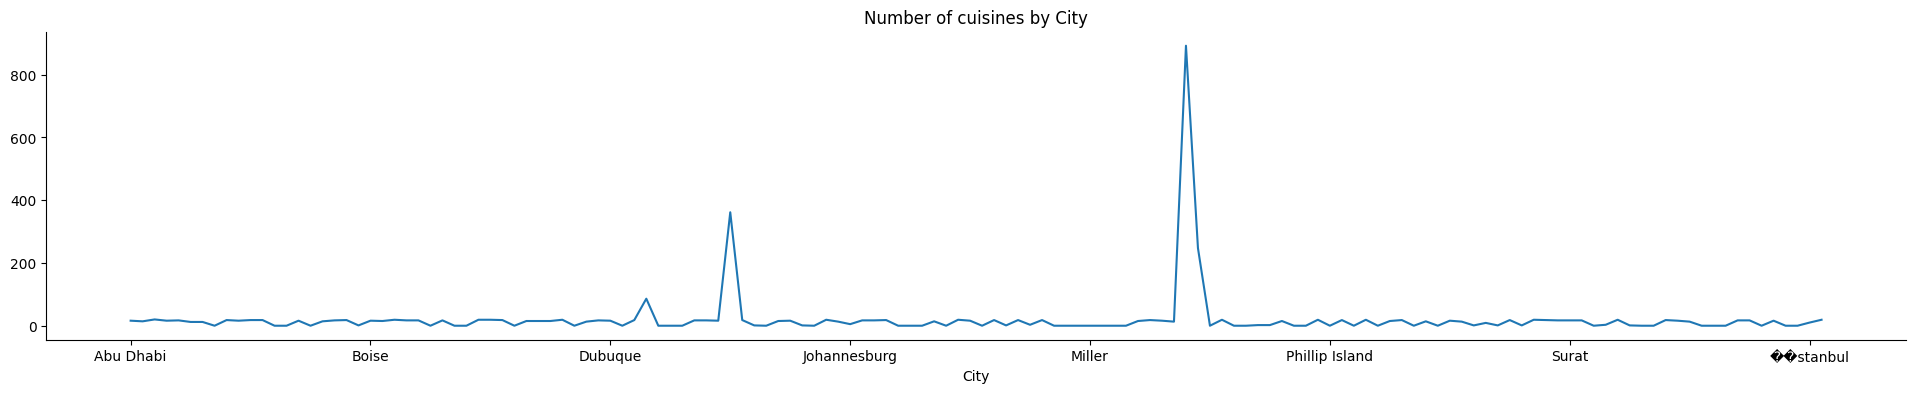

In [361]:
cuisine_counts_df['nofcu']=cuisine_counts_df.apply(set).apply(list).apply(lambda x : set(x)).apply(len)
#cuisine_counts_df.sort_values(by='nofcu',ascending=False)
cuisine_counts_df['nofcu'].plot(kind='line', figsize=(24, 4), title='Number of cuisines by City')
plt.gca().spines[['top', 'right']].set_visible(False)

In [154]:
vlst= list(cuisines_by_city['Cuisines'].apply(str.strip).apply(str.split).apply(set).to_list()) #.apply(len) #.sort_values(ascending=False)
cuisines_by_city['Cuisines'].apply(str.strip).apply(str.split).apply(set).apply(len)

,Cuisines
0,27
1,22
2,39
3,26
4,25
...,...
136,3
137,18
138,3
139,1


In [145]:
nlst = cuisines_by_city['City'].to_list()

In [364]:
cuisines_by_city['Cuisines'][cuisines_by_city['Cuisines'].apply(str.strip).apply(str.split).apply(set).apply(len) >1]

KeyError: 'Cuisines'

In [363]:
cnt_cu = cuisines_by_city.apply(str.strip).apply(str.split)
ln_cu = cuisines_by_city.apply(str.strip).apply(str.split).apply(set).apply(len).sort_values(ascending=False)

TypeError: descriptor 'strip' for 'str' objects doesn't apply to a 'list' object

In [362]:
print(f"Avarage cuisines per City:{int(ln_cu.mean())}")

NameError: name 'ln_cu' is not defined